Dataset Info:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age 

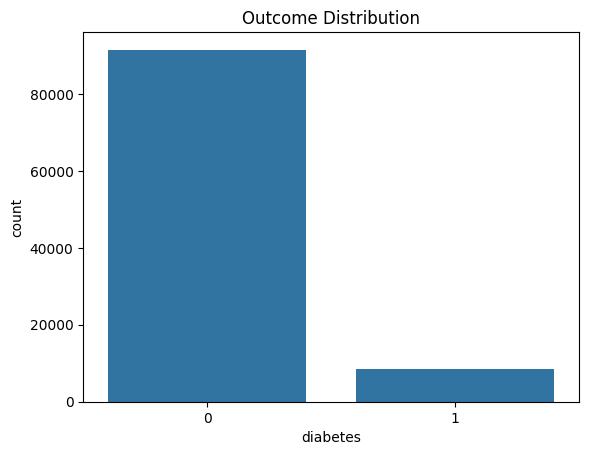

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


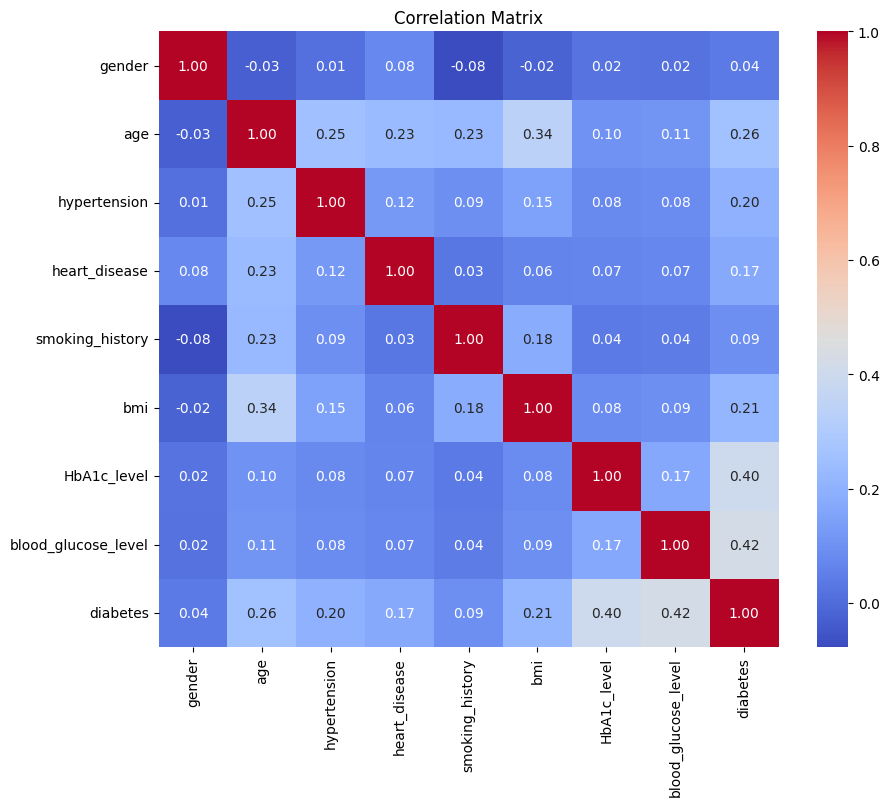


Train and Test shapes: (80000, 8) (20000, 8)


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression

# Load the dataset
diabetes_dataset = pd.read_csv('/Users/astha/Desktop/Diabetes Prediction/Datasets/Dataset2/diabetes_prediction_dataset.csv')

# Basic Overview
print("Dataset Info:")
print(diabetes_dataset.head())
print(diabetes_dataset.info())
print("\nSummary Statistics:")
print(diabetes_dataset.describe())

# Check for missing values
print("\nMissing Values:")
print(diabetes_dataset.isnull().sum())

# Outcome distribution
sns.countplot(data=diabetes_dataset, x='diabetes')
plt.title('Outcome Distribution')
plt.show()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Label encode the 'gender' and 'smoking_history' columns
diabetes_dataset['gender'] = label_encoder.fit_transform(diabetes_dataset['gender'])
diabetes_dataset['smoking_history'] = label_encoder.fit_transform(diabetes_dataset['smoking_history'])

# Verify the changes
print(diabetes_dataset.head())

# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Splitting Features and Labels
X = diabetes_dataset.drop(columns='diabetes', axis=1)
Y = diabetes_dataset['diabetes']

# Standardizing Features
scaler = MinMaxScaler()  # Using MinMaxScaler for improved scaling
X = scaler.fit_transform(X)

# Splitting the Dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print("\nTrain and Test shapes:", X_train.shape, X_test.shape)

In [3]:
# Use Logistic Regression instead of KNN
logreg = LogisticRegression(max_iter=1000)  # Initialize Logistic Regression model
logreg.fit(X_train, Y_train)  # Train the model

# Making predictions
ypred_train = logreg.predict(X_train)  
ypred_test = logreg.predict(X_test)   

# Calculating Accuracy for Training and Testing
accuracy_train = accuracy_score(Y_train, ypred_train)
accuracy_test = accuracy_score(Y_test, ypred_test)

# Printing Accuracy for Training and Testing
print(f"Training Accuracy: {accuracy_train * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_test * 100:.2f}%")


Training Accuracy: 95.99%
Testing Accuracy: 96.13%
